In [11]:
#imports
import numpy as np
import matplotlib.pyplot as plt

#magic command
%matplotlib inline

#### Importing the data

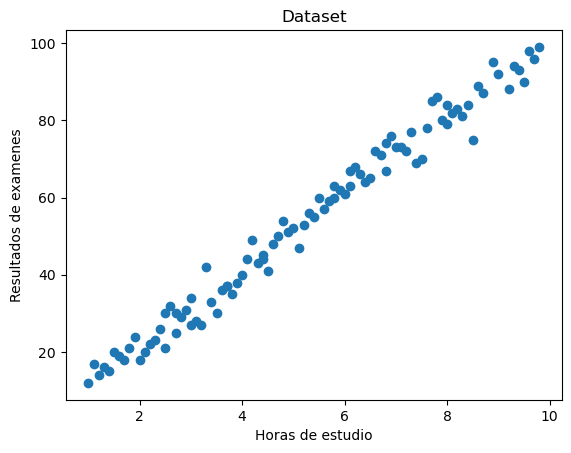

In [12]:
#Load data
points = genfromtxt('score.csv', delimiter=',')

#Extract columns
x = array(points[:,0])
y = array(points[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Horas de estudio')
plt.ylabel('Resultados de examenes')
plt.title('Dataset')
plt.show()

#### Defining the hyperparameters


In [13]:
#Hyperparameters
learning_rate = 0.01
initial_b = 0
initial_m = 0
num_iterations = 50

#### Defining the cost function


In [14]:
# Cost function 
def compute_cost(b, m, points):
    total_cost = 0
    
    # Extracting the x and y values from the points array
    x = points[:, 0]  # Extracting the x values (feature)
    y = points[:, 1]  # Extracting the y values (target)
    
    # Compute sum of squared errors
    total_cost = np.sum((y - (m * x + b)) ** 2)
    
    # Return average of squared error
    return total_cost / len(points)

#### Defining Gradient Descent functions


In [17]:
def run_gradient_descent(points, initial_b, initial_m, learning_rate, num_iterations):
    # Initialize the intercept and slope parameters
    b = initial_b
    m = initial_m
    # List to store the history of costs in each iteration
    cost_history = []

    # Loop iterating over the specified number of iterations. For each iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        # Calculate the current cost and append it to the history
        cost_history.append(compute_cost(b, m, points))
        
        # Update the parameters using the update function
        b, m = update_parameters(b, m, np.array(points), learning_rate)

    # Return the final values of b and m, along with the cost history
    return [b, m, cost_history]

def calculate_gradients(b_current, m_current, points, learning_rate):
    # Initialize gradients to zero
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    # Calculate Gradients
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    # Update current m and b using gradients and learning rate
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    # Return updated parameters
    return b_updated, m_updated

#### Running run_gradient_descent() to get optimized parameters b and m


In [18]:
# Running run_gradient_descent() to get optimized parameters b and m
b, m, cost_graph = run_gradient_descent(points, initial_b, initial_m, learning_rate, num_iterations)

# Print optimized parameters
print('Optimized b:', b)
print('Optimized m:', m)

# Print error with optimized parameters
minimized_cost = compute_cost(b, m, points)
print('Minimized cost:', minimized_cost)

NameError: name 'update_parameters' is not defined